## 매출 분석

In [153]:
import pandas as pd

# 파일 불러오기
file_path = file_path = file_path = "C:/Users/tpfkv/OneDrive/문서/2025/Prj-CosmeticEcommerceConversion/"
df = pd.read_csv(file_path + 'funnel.csv')

# 데이터 확인
df.head()

,month,view_sessions,cart_sessions,purchase_sessions,view_to_cart_rate,cart_to_purchase_rate,view_to_purchase_rate
0,2019-12,787051,93338,13158,11.86,14.10,1.67
1,2020-01,902327,110500,14279,12.25,12.92,1.58
2,2020-02,866381,105600,13039,12.19,12.35,1.50


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23876\4241867780.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(stages, fontsize=12)


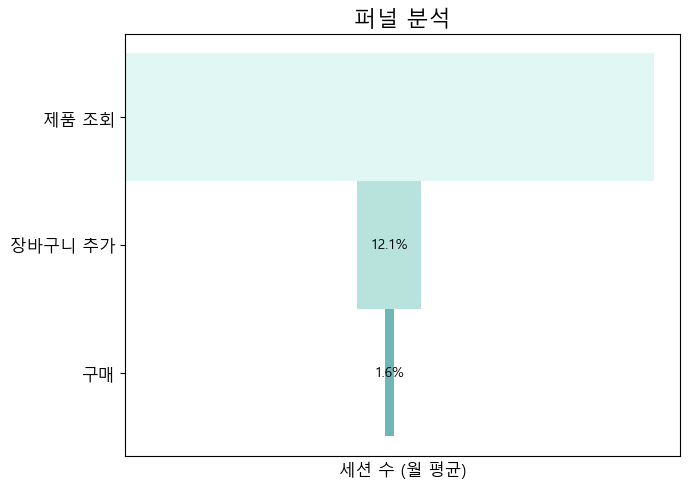

In [155]:
# 월별 평균값 계산
avg_view_sessions = df['view_sessions'].mean()
avg_cart_sessions = df['cart_sessions'].mean()
avg_purchase_sessions = df['purchase_sessions'].mean()
avg_view_to_cart_rates = df['view_to_cart_rate'].mean()
avg_view_to_purchase_rates = df['view_to_purchase_rate'].mean()

# 퍼널 데이터 준비
stages = ['제품 조회', '장바구니 추가', '구매']
values = [avg_view_sessions, avg_cart_sessions, avg_purchase_sessions]
labels = ['', f'{avg_view_to_cart_rates:.1f}%', f'{avg_view_to_purchase_rates:.1f}%']

# 한글 폰트 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 색상 설정
colors = ['#E0F7F4', '#B8E2DC', '#6FB7B7']

# 퍼널형 시각화
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(len(stages)):
    ax.barh(
        y=stages[i],
        width=values[i],
        color=colors[i],
        height=1,
        left=(max(values) - values[i]) / 2
    )
    # 레이블 (가운데 위치)
    ax.text(
        x=max(values) / 2,
        y=i,
        s=labels[i],
        ha='center',
        va='center',
        color='black',
        fontsize=10
    )

# 제목과 라벨
ax.set_title('퍼널 분석', fontsize=16)
ax.set_xlabel('세션 수 (월 평균)', fontsize=12)
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticklabels(stages, fontsize=12)

# 격자 제거, 여백 조정
ax.grid(False)
plt.tight_layout()

plt.show()

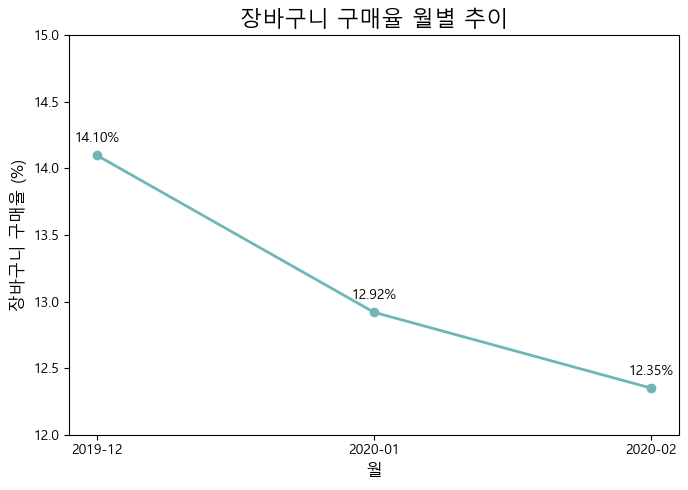

In [157]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준)
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화
plt.figure(figsize=(7, 5))
plt.plot(df['month'], df['cart_to_purchase_rate'], marker='o', linestyle='-', linewidth=2, color='#6FB7B7')

# 레이블 추가
for i, txt in enumerate(df['cart_to_purchase_rate']):
    plt.text(df['month'][i], txt + 0.1, f'{txt:.2f}%', ha='center', fontsize=10)

plt.title('장바구니 구매율 월별 추이', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('장바구니 구매율 (%)', fontsize=12)
plt.ylim(12, 15)
plt.tight_layout()
plt.show()


## 장바구니 이탈 분석

In [129]:
import pandas as pd

# 파일 불러오기
file_path = file_path = "C:/Users/tpfkv/OneDrive/문서/2025/Prj-CosmeticEcommerceConversion/"
df2 = pd.read_csv(file_path+"abandonRatecsv.csv")

# 데이터 확인
df2.head()

,month,cart_sessions,purchase_sessions,explicit_removal_sessions,implicit_abandon_sessions,cart_to_purchase_rate,explicit_abandon_rate,implicit_abandon_rate,total_abandon_rate
0,2019-12,162464,22819,37255,89496,14.05,22.93,55.09,78.02
1,2020-01,191470,25063,44839,105640,13.09,23.42,55.17,78.59
2,2020-02,185478,22786,44096,103238,12.29,23.77,55.66,79.43


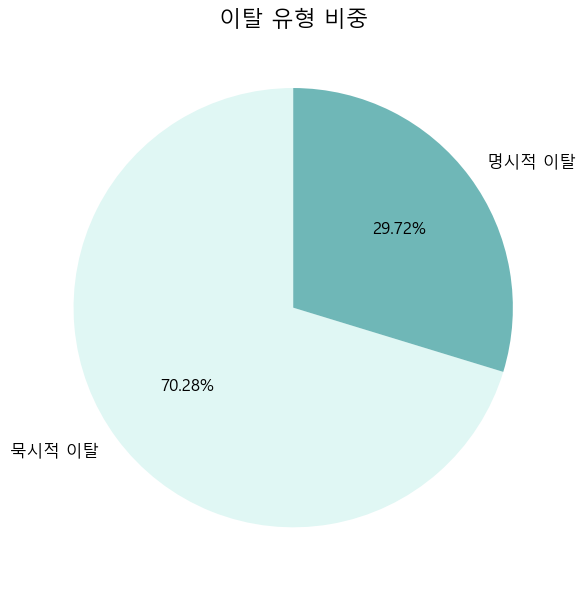

In [131]:
import matplotlib.pyplot as plt

avg_explicit_removal_sessions = df2['explicit_removal_sessions'].mean()
avg_implicit_abandon_sessions = df2['implicit_abandon_sessions'].mean()

labels = ['묵시적 이탈', '명시적 이탈']
sizes = [avg_implicit_abandon_sessions, avg_explicit_removal_sessions]
colors = ['#E0F7F4', '#6FB7B7']

# 시각화
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('이탈 유형 비중', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [137]:
import pandas as pd

# 파일 불러오기
file_path = "C:/Users/tpfkv/OneDrive/문서/2025/Prj-CosmeticEcommerceConversion/"
df3 = pd.read_csv(file_path+'conversionByPrice.csv')

# 데이터 확인
df3.head()

,price_group,cart_sessions,purchase_sessions,explicit_abandon_sessions,implicit_abandon_sessions,cart_to_purchase_rate,explicit_abandon_rate,implicit_abandon_rate,total_abandon_rate
0,low,356224,49871,50838,253146,14.00,14.27,71.06,85.34
1,mid,1808790,218032,359422,1215646,12.05,19.87,67.21,87.08
2,high,471179,62758,96706,307644,13.32,20.52,65.29,85.82


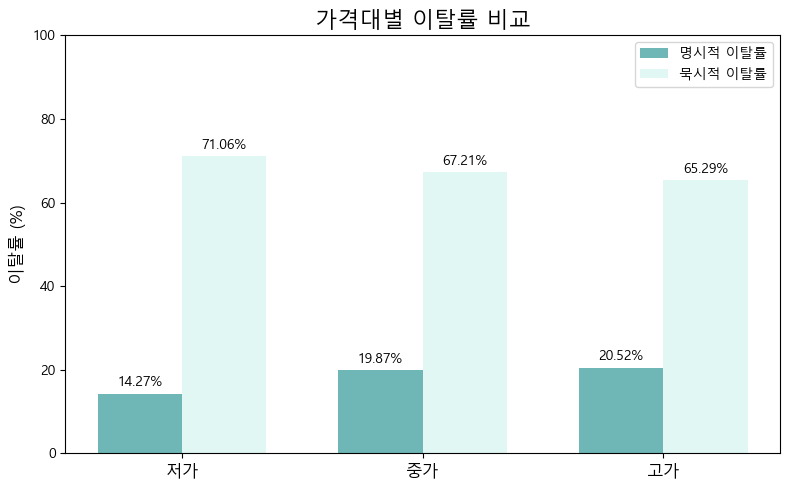

In [161]:
# 시각화: 가격대별 명시적/묵시적 이탈률 비교

import matplotlib.pyplot as plt
import numpy as np

labels = ['저가', '중가', '고가']
explicit = df3['explicit_abandon_rate']
implicit = df3['implicit_abandon_rate']

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, explicit, width, label='명시적 이탈률', color='#6FB7B7')
bars2 = plt.bar(x + width/2, implicit, width, label='묵시적 이탈률', color='#E0F7F4')

# 레이블 추가
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)


plt.ylabel('이탈률 (%)', fontsize=12)
plt.title('가격대별 이탈률 비교', fontsize=16)
plt.xticks(x, labels, fontsize=12)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

## 가격대 분포 확인

In [13]:
import pandas as pd

# 파일 불러오기
file_path = "C:/Users/tpfkv/OneDrive/문서/2025/Prj-CosmeticEcommerceConversion/"
df = pd.read_csv(file_path+'cartStatusByPrice.csv')

df.head()

,month,price,has_cart,cart_to_remove,implicit_abandon,cart_to_purchase
0,2019-12,1.19,1,0.0,0.0,1.0
1,2019-12,1.19,1,0.0,1.0,0.0
2,2019-12,4.44,1,0.0,1.0,0.0
3,2019-12,0.40,1,0.0,0.0,1.0
4,2019-12,2.79,1,0.0,1.0,0.0


In [34]:
from scipy.stats import normaltest

stat, p = normaltest(df['price'])

print(f'D’Agostino 통계량: {stat:.4f}, p-value: {p:.4f}')


D’Agostino 통계량: 4688945.0713, p-value: 0.0000


In [36]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(
    df[df['cart_to_purchase'] == 1]['price'],
    df[df['cart_to_purchase'] == 0]['price'],
    alternative='two-sided'
)

print(f"U 통계량: {u_stat}, p-value: {p_val}")

U 통계량: 377826553201.5, p-value: 3.795503339522134e-18


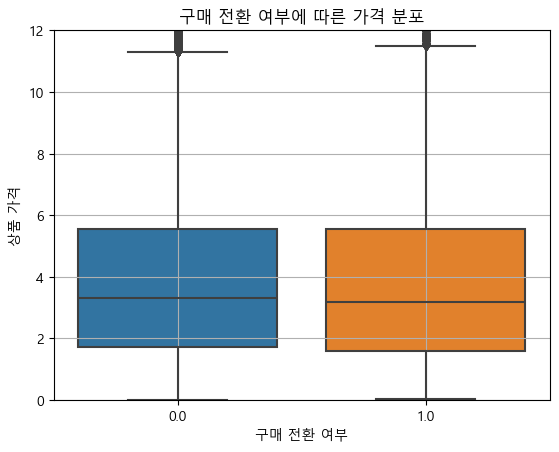

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='cart_to_purchase', y='price', data=df)
plt.title('구매 전환 여부에 따른 가격 분포')
plt.xlabel('구매 전환 여부')
plt.ylabel('상품 가격')
plt.ylim(0, 12)
plt.grid(True)
plt.show()

In [38]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(
    df[df['cart_to_remove'] == 1]['price'],
    df[df['cart_to_remove'] == 0]['price'],
    alternative='two-sided'
)

print(f"U 통계량: {u_stat}, p-value: {p_val}")

U 통계량: 576184057019.0, p-value: 0.0


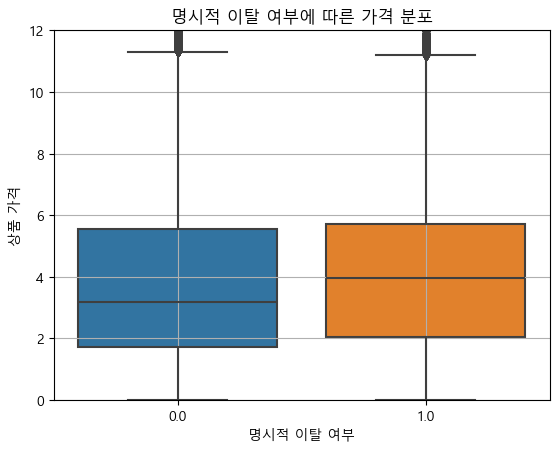

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='cart_to_remove', y='price', data=df)
plt.title('명시적 이탈 여부에 따른 가격 분포')
plt.xlabel('명시적 이탈 여부')
plt.ylabel('상품 가격')
plt.ylim(0, 12)
plt.grid(True)
plt.show()

In [40]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(
    df[df['implicit_abandon'] == 1]['price'],
    df[df['implicit_abandon'] == 0]['price'],
    alternative='two-sided'
)

print(f"U 통계량: {u_stat}, p-value: {p_val}")

U 통계량: 728997306065.0, p-value: 0.0


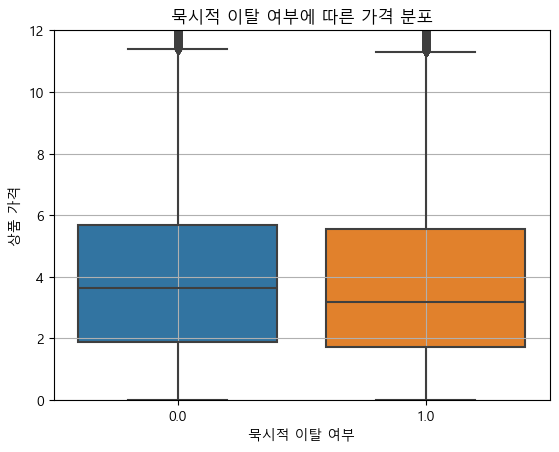

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='implicit_abandon', y='price', data=df)
plt.title('묵시적 이탈 여부에 따른 가격 분포')
plt.xlabel('묵시적 이탈 여부')
plt.ylabel('상품 가격')
plt.ylim(0, 12)
plt.grid(True)
plt.show()

In [74]:
df.shape

(2635799, 6)

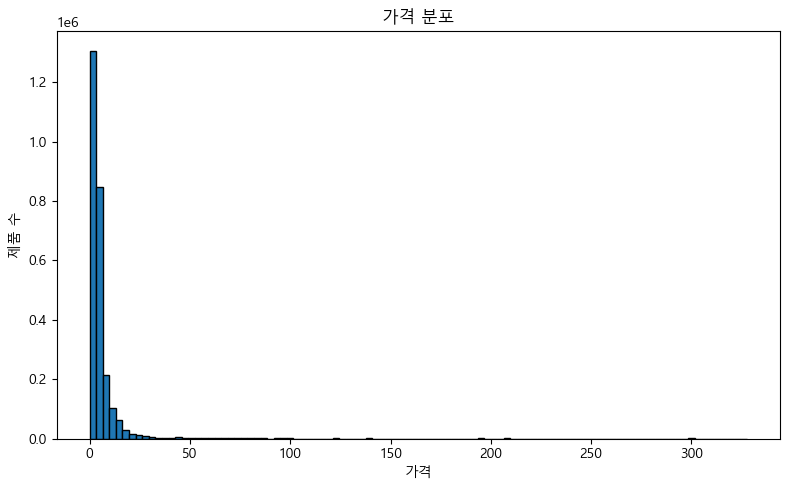

In [76]:
# 분포 확인하기
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준)
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=100, edgecolor='black')
plt.title("가격 분포")
plt.xlabel("가격")
plt.ylabel("제품 수")
plt.tight_layout()
plt.show()

In [78]:
df['price'].describe()

count    2.635799e+06
mean     5.343069e+00
std      1.041488e+01
min      0.000000e+00
25%      1.730000e+00
50%      3.330000e+00
75%      5.560000e+00
max      3.277800e+02
Name: price, dtype: float64

In [84]:
import pandas as pd

# 파일 불러오기
file_path = "C:/Users/tpfkv/OneDrive/문서/2025/Prj-CosmeticEcommerceConversion/"
df = pd.read_csv(file_path+'cartStatusByPrice.csv')

df.head()

,month,price,has_cart,cart_to_remove,implicit_abandon,cart_to_purchase
0,2019-12,1.19,1,0.0,0.0,1.0
1,2019-12,1.19,1,0.0,1.0,0.0
2,2019-12,4.44,1,0.0,1.0,0.0
3,2019-12,0.40,1,0.0,0.0,1.0
4,2019-12,2.79,1,0.0,1.0,0.0


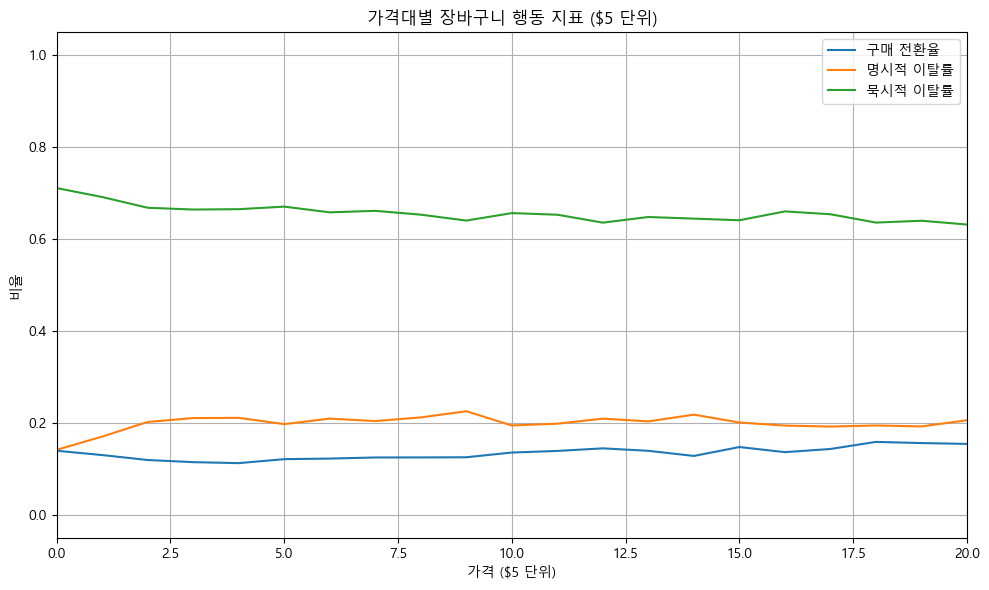

In [96]:
# 가격을 $5 단위로 버킷화
df['price_bin'] = df['price'].apply(lambda x: int(x))

# 가격대별 데이터 집계
grouped = df.groupby('price_bin').agg({
    'has_cart': 'sum',
    'cart_to_remove': 'sum',
    'implicit_abandon': 'sum',
    'cart_to_purchase': 'sum'
}).reset_index()

# 각 지표 계산
grouped['purchase_rate'] = grouped['cart_to_purchase'] / grouped['has_cart']
grouped['explicit_abandon_rate'] = grouped['cart_to_remove'] / grouped['has_cart']
grouped['implicit_abandon_rate'] = grouped['implicit_abandon'] / grouped['has_cart']

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(grouped['price_bin'], grouped['purchase_rate'], label='구매 전환율')
plt.plot(grouped['price_bin'], grouped['explicit_abandon_rate'], label='명시적 이탈률')
plt.plot(grouped['price_bin'], grouped['implicit_abandon_rate'], label='묵시적 이탈률')
plt.xlabel('가격 ($5 단위)')
plt.ylabel('비율')
plt.xlim(0, 20)
plt.title('가격대별 장바구니 행동 지표 ($5 단위)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

log_prices = np.log1p(df['price'])
plt.hist(log_prices, bins=50)
plt.title("로그 변환된 가격 분포")
plt.xlabel("log(price + 1)")
plt.ylabel("제품 수")
plt.show()

In [ ]:
## 로그 역변환
import numpy as np
log_bins = [0, 1, 2, 3, 4, 5]

for i in range(len(log_bins) - 1):
    lower = np.exp(log_bins[i]) - 1
    upper = np.exp(log_bins[i+1]) - 1
    print(f"log(price+1) ∈ [{log_bins[i]}, {log_bins[i+1]}) → price ∈ [{lower:.2f}, {upper:.2f})")

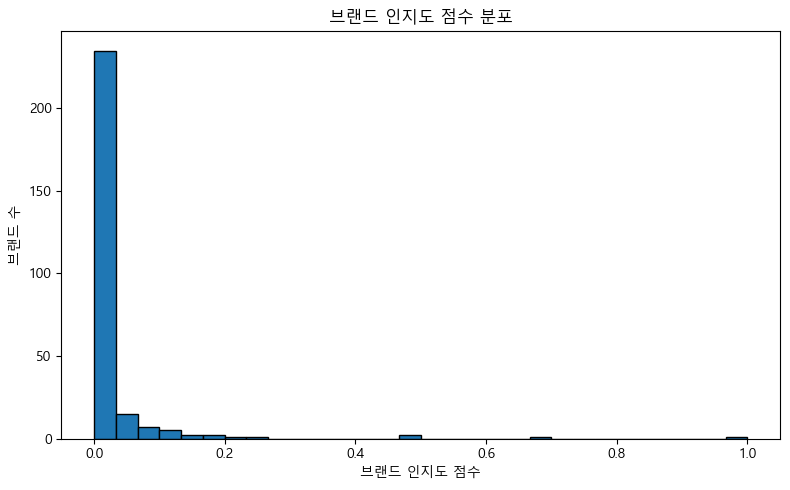

In [167]:
# 브랜드 인지도 점수 분포 확인하기
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
file_path = "C:/Users/tpfkv/OneDrive/문서/2025/Prj-CosmeticEcommerceConversion/"
brand_score_df = pd.read_csv(file_path+'brandScore.csv')

# 한글 폰트 설정 (윈도우 기준)
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(brand_score_df['brand_score'], bins=30, edgecolor='black')
plt.title("브랜드 인지도 점수 분포")
plt.xlabel("브랜드 인지도 점수")
plt.ylabel("브랜드 수")
plt.tight_layout()
plt.show()

In [169]:
# 계산: 상위 10%, 20%, 30%의 커트오프 지점 확인
percentiles = [90, 80, 70, 50, 30, 10]
cutoffs = {f"Top {100 - p}% cutoff": brand_score_df['brand_score'].quantile(p / 100) for p in percentiles}

# 변환 결과 정리
cutoffs_df = pd.DataFrame(list(cutoffs.items()), columns=["구간", "brand_score 커트오프"])
import ace_tools as tools; tools.display_dataframe_to_user(name="Brand Score 컷오프 기준표", dataframe=cutoffs_df)
cutoffs_df

ModuleNotFoundError: No module named 'ace_tools'

In [163]:
import pandas as pd

# 파일 불러오기
file_path = "C:/Users/tpfkv/OneDrive/문서/2025/Prj-CosmeticEcommerceConversion/"
df4 = pd.read_csv(file_path+'conversionByBrand.csv')

# 데이터 확인
df4.head()

,brand_group,cart_brands,purchase_brands,explicit_abandon_brands,implicit_abandon_brands,cart_to_purchase_rate,explicit_abandon_rate,implicit_abandon_rate
0,low,2506,345,506,1637,13.77,20.19,65.32
1,mid,94053,13647,18422,61464,14.51,19.59,65.35
2,high,2539622,316982,488055,1712997,12.48,19.22,67.45


In [ ]:
# 시각화: 가격대별 명시적/묵시적 이탈률 비교

import matplotlib.pyplot as plt
import numpy as np

labels = ['낮은 인지도', '보통 인지도', '높은 인지도']
explicit = df3['explicit_abandon_rate']
implicit = df3['implicit_abandon_rate']

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, explicit, width, label='명시적 이탈률', color='#6FB7B7')
bars2 = plt.bar(x + width/2, implicit, width, label='묵시적 이탈률', color='#E0F7F4')

# 레이블 추가
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)


plt.ylabel('이탈률 (%)', fontsize=12)
plt.title('가격대별 이탈률 비교', fontsize=16)
plt.xticks(x, labels, fontsize=12)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()